In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_csv("D:\data-analytics\Social_Network_Ads.csv")
data.drop(columns=["User ID","Gender","EstimatedSalary"], inplace = True)
data.head(5)

,Age,Purchased
0,19,0
1,35,0
2,26,0
3,27,0
4,19,0


<AxesSubplot:xlabel='Age', ylabel='Purchased'>

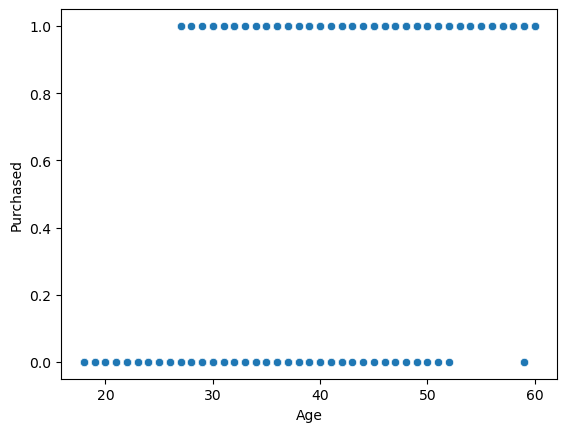

In [2]:
sns.scatterplot(x="Age", y="Purchased",data=data)

In [3]:
x=data.iloc[:,:-1]
y=data["Purchased"]
from sklearn.model_selection import train_test_split
x_train, x_test , y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42) #issme data ko do part me divide kr diya hai randomly , train krne ke liye aur test krne ke liye
x_train

,Age
3,27
18,46
202,39
250,44
274,57
...,...
71,24
106,26
270,43
348,39


In [4]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [5]:
lr.score(x_test,y_test)

0.9125

In [6]:
lr.predict([[40]])

C:\Users\Meghana Tamrakar\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

<AxesSubplot:xlabel='Age', ylabel='Purchased'>

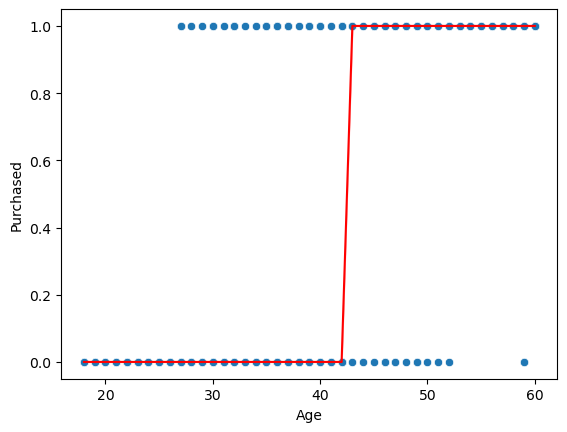

In [7]:
sns.scatterplot(x="Age", y="Purchased",data=data)
sns.lineplot(x="Age",y=lr.predict(x),data=data,color="red") #yeh hmari prediction line hai

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
data2 = pd.read_csv("D:\data-analytics\Social_Network_Ads.csv")
data2.drop(columns=["User ID","Gender"], inplace = True)
data2.head(5)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


<AxesSubplot:xlabel='Age', ylabel='EstimatedSalary'>

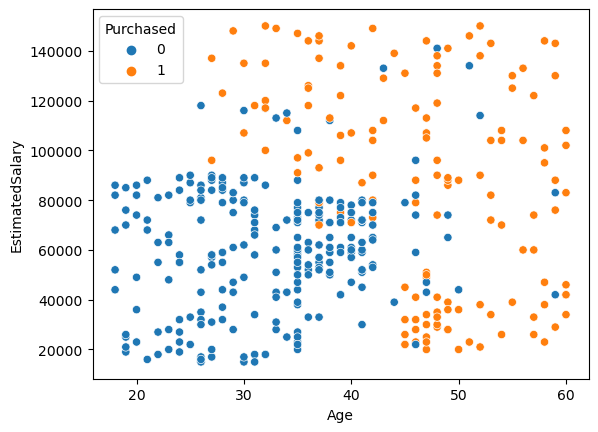

In [9]:
sns.scatterplot(x="Age",y="EstimatedSalary", data=data2, hue="Purchased")

In [10]:
x = data2.iloc[:,:-1]
y = data2["Purchased"]

In [11]:
x_train, x_test , y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [12]:
lr.score(x_test,y_test)

0.8875

In [13]:
lr.predict([[48,41000]])

C:\Users\Meghana Tamrakar\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

C:\Users\Meghana Tamrakar\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


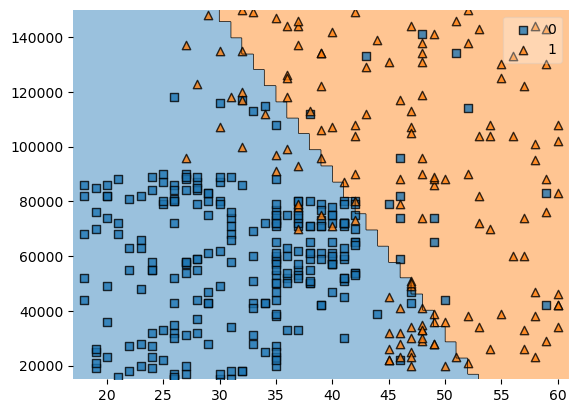

In [14]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x.to_numpy(), y.to_numpy(), clf=lr) #yeh is technique ke through sahi se classify nahi kr paarha haii, aur issko thik krne ke liye hum polynomial regression ka use krenge
plt.show()

In [15]:
lr.coef_

array([[2.07808219e-01, 3.54979001e-05]])

In [16]:
lr.intercept_

array([-11.40367505])

In [17]:
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree=2) #hum degrees ki value badhate jayenge toh humme accuracy me variation dekhne milne lagega, jis degree me accuracy high milegi ussko hi consider krenge 
pf.fit(x)
x = pd.DataFrame(pf.transform(x))
x

,0,1,2,3,4,5
0,1.0,19.0,19000.0,361.0,361000.0,3.610000e+08
1,1.0,35.0,20000.0,1225.0,700000.0,4.000000e+08
2,1.0,26.0,43000.0,676.0,1118000.0,1.849000e+09
3,1.0,27.0,57000.0,729.0,1539000.0,3.249000e+09
4,1.0,19.0,76000.0,361.0,1444000.0,5.776000e+09
...,...,...,...,...,...,...
395,1.0,46.0,41000.0,2116.0,1886000.0,1.681000e+09
396,1.0,51.0,23000.0,2601.0,1173000.0,5.290000e+08
397,1.0,50.0,20000.0,2500.0,1000000.0,4.000000e+08
398,1.0,36.0,33000.0,1296.0,1188000.0,1.089000e+09


In [18]:
x_train, x_test , y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)
from sklearn.linear_model import LogisticRegression 
lr = LogisticRegression()
lr.fit(x_train,y_train)

lr.score(x_test,y_test) #issme toh aur jyda kam hogya hmari accuracy 
#degree bada rahe hai to accuracy aur kam hoti ja rhi hai

#issliye hum yahn pr linear logisctic regression ko follow krenge
#y = 1/(1+e^-x)

0.8625

In [20]:
dataset = pd.read_csv("D:\data-analytics\Iris.csv")
dataset.head(5)
dataset["Species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

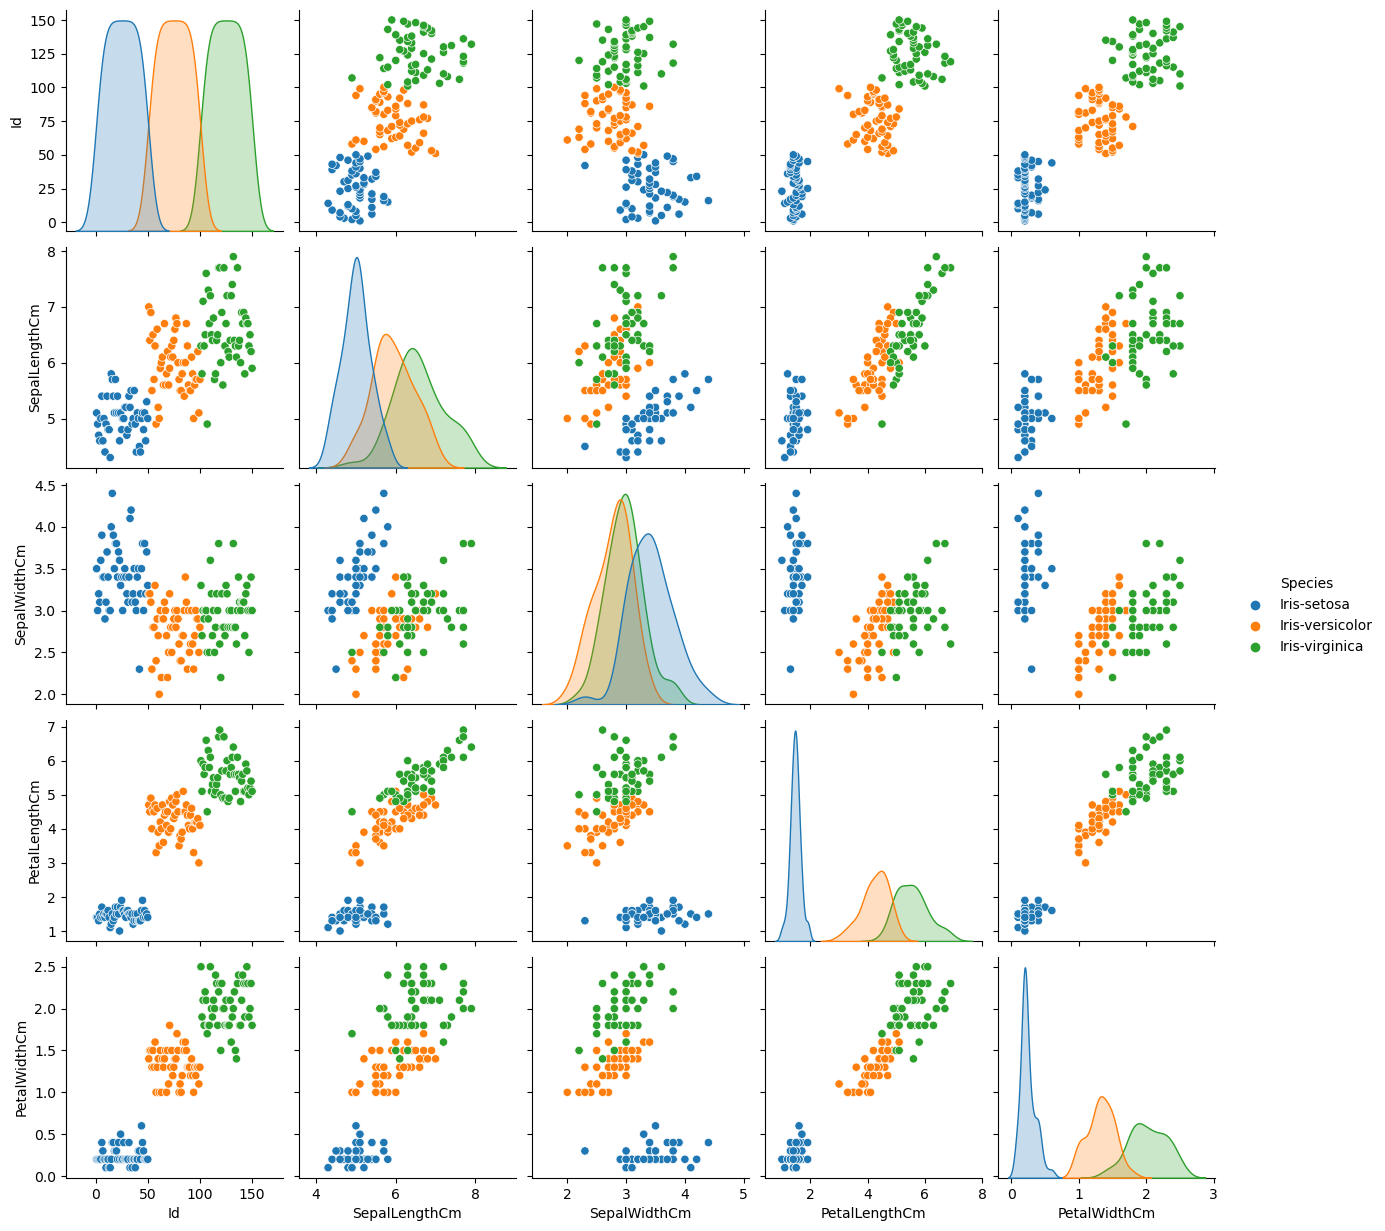

In [23]:
sns.pairplot(data=dataset, hue = "Species")

In [24]:
#in saare graph se hme features selectionn krne ki knowledge mil skti hai
x = dataset.iloc[:,:-1]
y = dataset["Species"]

In [28]:
x_train1, x_test1 , y_train1, y_test1 = train_test_split(x,y,test_size=0.2, random_state=42)
from sklearn.linear_model import LogisticRegression 

# OVR METHOD

In [29]:
lr2 = LogisticRegression(multi_class="ovr")
lr2.fit(x_train1,y_train1)

C:\Users\Meghana Tamrakar\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(multi_class='ovr')

In [31]:
lr2.score(x_test1,y_test1)*100 #100% accuracy using ovr method

100.0

# MULTINOMIAL

In [ ]:
lr3 = LogisticRegression(multi_class="multinomial")
lr3.fit(x_train1,y_train1)

In [33]:
lr3.score(x_test1,y_test1)*100 #100% accuracy using ovr method

100.0

# AUTO

In [38]:
lr4 = LogisticRegression(multi_class="auto")
# lr4 = LogisticRegression() => hum aisa bhi use kr skte hai, yhan pr bhi yeh auto hi hoga aur same result aayega
lr4.fit(x_train1,y_train1)

C:\Users\Meghana Tamrakar\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\Meghana Tamrakar\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='auto')

In [39]:
lr4.score(x_test1,y_test1)*100 #100% accuracy using ovr method

100.0

In [ ]:
#kabhi